# Introdução

Um outra ferramenta para análise no domínio da frequência é a transformada Wavelet. A operação desta transformada é realizada pela convolução com um sinal previamente conhecido, e o resultado, diferente da transformada de Fourier representa uma semelhança entre o sinal de entrada e o sinal usado como base.

Dentre as funções base para a transformada Wavelet, detaca-se o operador Haar, que utiliza sinais quadrados de frequência fixas para extrair informações pertinentes ao sinal. A representação matemática dar-se da seguinte forma:

$$ T = HFH $$

F é a matriz de entrada, H a matriz wavelet e T o resultado da trasnformada.

# Discussão do método

O método da transformada Wavelet, com funções de base Haar extrair informações presentes na imagem e promover uma compressão do sinal.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

- Abrir imagem:

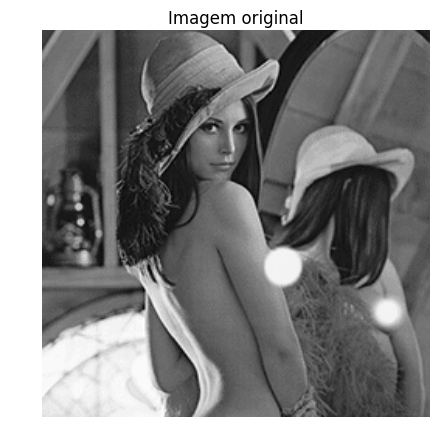

In [2]:
img = np.array(cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE))

plt.figure(1, figsize=(5,5))
plt.axis('off')
plt.imshow(img, 'gray')
plt.title("Imagem original")
plt.show()

In [38]:
# Reshape image, placing all pixels in a row:
img2 = img.reshape((img.shape[0]*img.shape[1]),1)

# Turn image into a 32-bit float type:
img2 = np.float32(img2)

In [40]:

numClusters = 12
Images = np.zeros([numClusters,img.shape[0],img.shape[1]])

for k in range (0,12):

    criteria = ((cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0))
    K = k+1
    
    print('K-Cluster number #%d' %K)
    print('Starting...')
    
    error, labels, centers = cv2.kmeans(img2, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Now convert back into uint8, and make original image
    centers = np.uint8(centers)
    #print(centers)
    # Turn labels of each pixels into one dimensional
    labels.flatten()
    # Create an array of the same size os image, where each label recieves the value of the center(pixel intensity)
    img_out = centers[labels.flatten()]
    # Reshape image again:
    Images[k,:,:] = img_out.reshape((img.shape))

print('Clustering has finished')

K-Cluster number #1
Starting...
K-Cluster number #2
Starting...
K-Cluster number #3
Starting...
K-Cluster number #4
Starting...
K-Cluster number #5
Starting...
K-Cluster number #6
Starting...
K-Cluster number #7
Starting...
K-Cluster number #8
Starting...
K-Cluster number #9
Starting...
K-Cluster number #10
Starting...
K-Cluster number #11
Starting...
K-Cluster number #12
Starting...
Clustering has finished


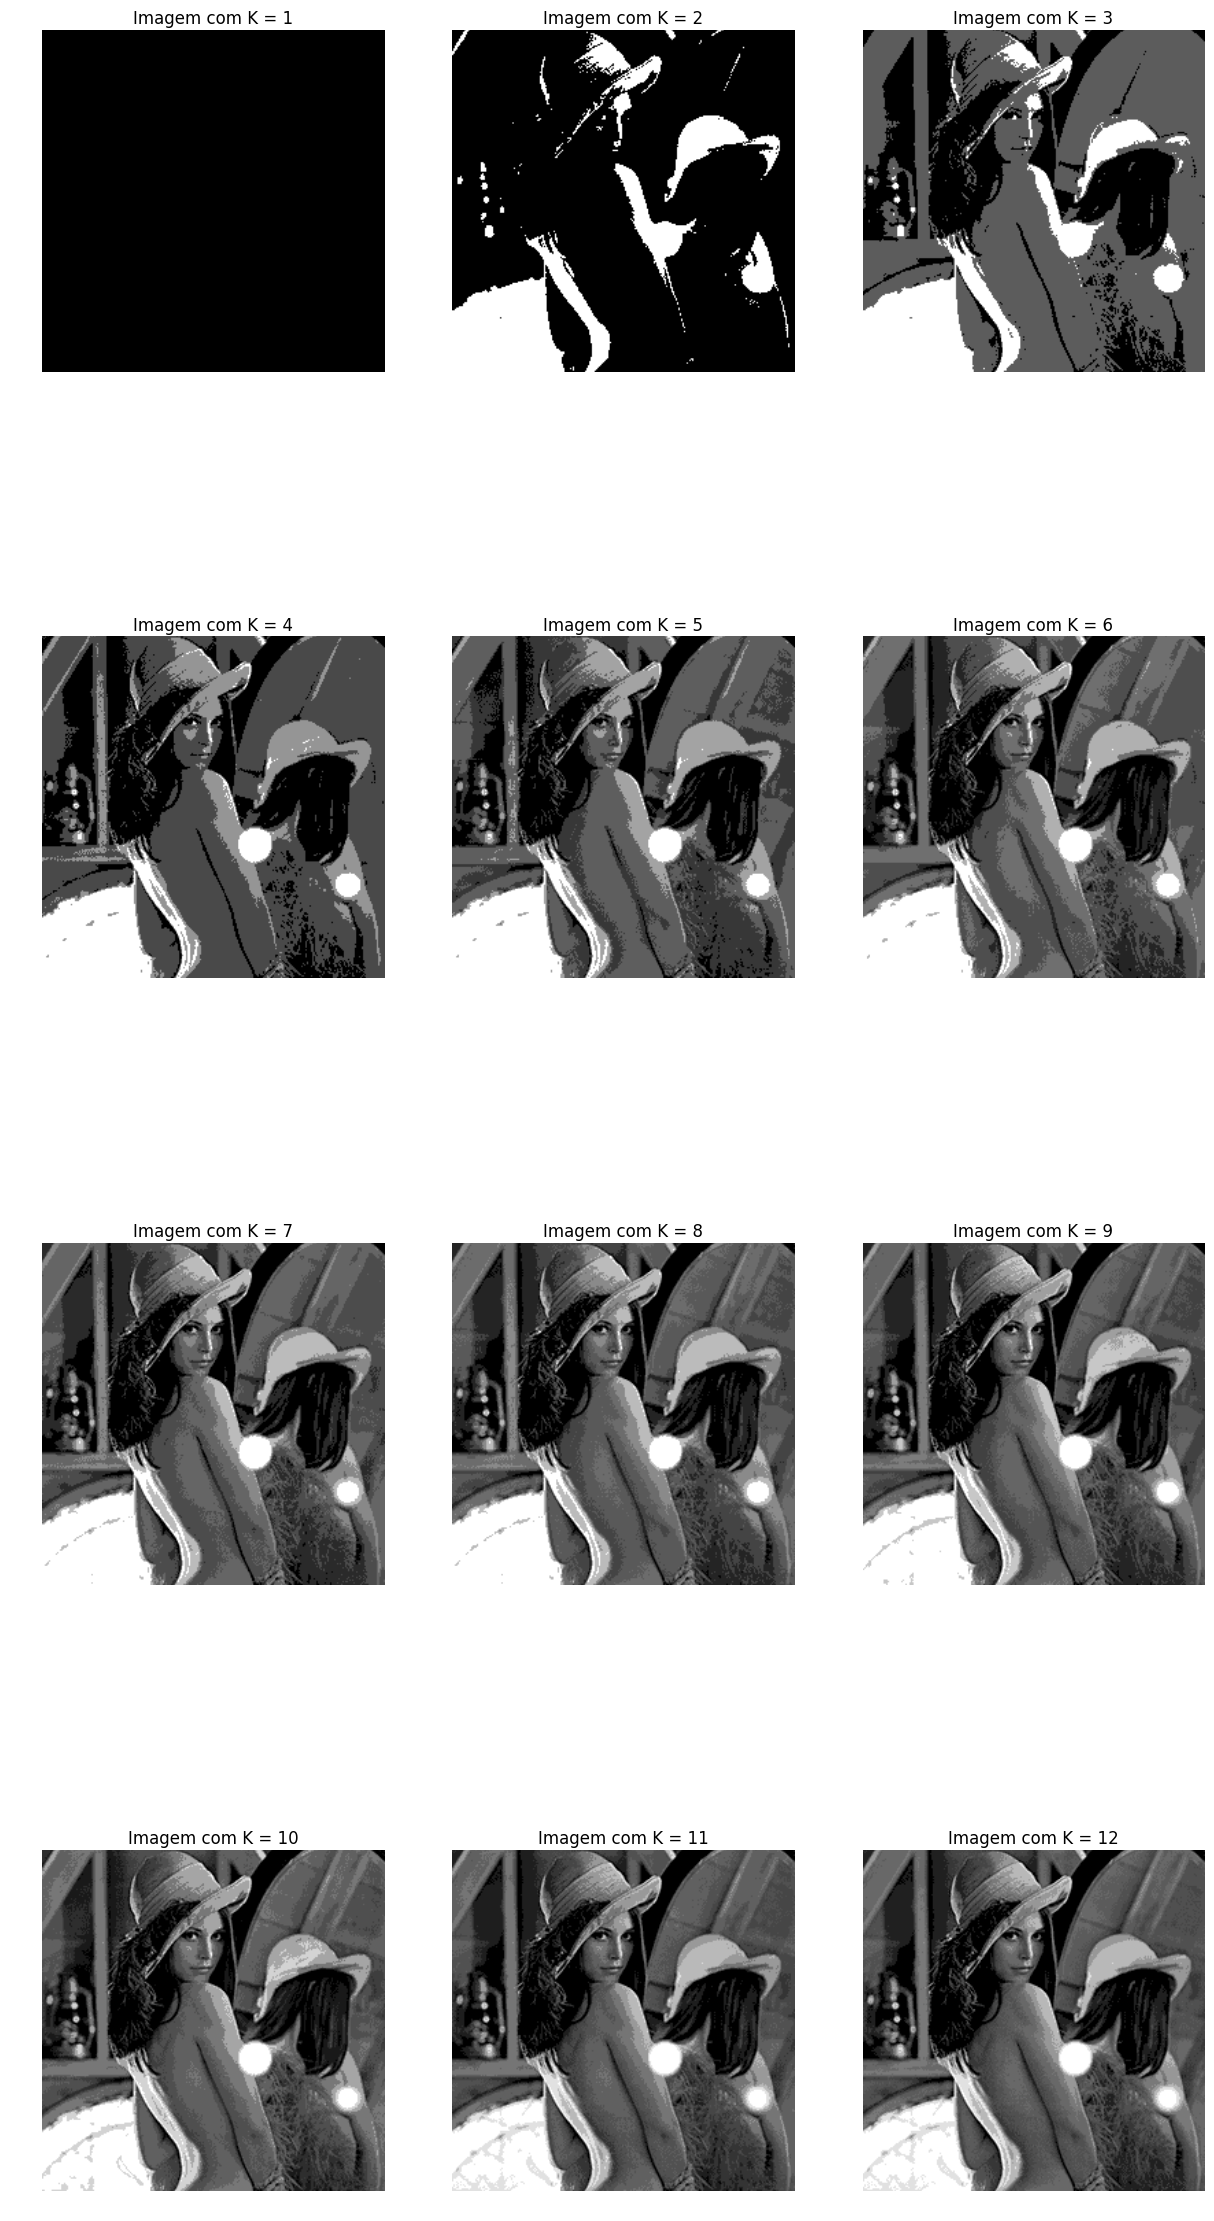

In [52]:
plt.figure(2, figsize=(15,30))
for k in range (1,13):
    plt.subplot(3+1,3,k)
    plt.axis('off')
    plt.imshow(Images[k-1,:,:], 'gray')
    plt.title("Imagem com K = %d" %k)
plt.show()

O resultado da transformada de haar são três subprodutos da imagem original, implementados da seguinte forma: (i) a imagem original passa por uma filtragem passa-alta resultando em três imagens, chamadas de coeficientes, com informações pertinentes a linhas horizontais, verticais e diagonais; (ii) após isso as imagens passam por uma filtragem passa-baixa, com o intuito de preservar as características originais e por fim (iii) passam por um processo de downscalling.

# Conclusões

A transformada Haar pode ser uma ferramenta útil quando trata-se de compreensão de imagens, pois as informações extraídas com a aplicação desssa transformada são de aproximações e predições da imagem original, sofrendo um processo de redução de dimensionailidade.